In [4]:
import numpy as np
import matplotlib.pyplot as plt

In [5]:
import pandas as pd
from scipy.interpolate import make_interp_spline, BSpline, make_lsq_spline
from scipy.optimize import curve_fit

In [6]:
pruning_filename = './../eval_results/alexnet/eval_alexnet_pruning.csv'
pruning_quant_filename = './../eval_results/alexnet/eval_alexnet_pruning_quant.csv'

In [7]:
pruning_data = pd.read_csv(pruning_filename, decimal=',')
pruning_quant_data = pd.read_csv(pruning_quant_filename, decimal=',')

In [8]:
print(pruning_data)

   sparsity_level  accuracy  params_set_to_0  size_mb_after_huffman  \
0             0.0     0.662         56885962                  208.8   
1             0.1     0.699         51320174                  195.8   
2             0.2     0.704         45643001                  180.1   
3             0.3     0.705         40077743                  162.7   
4             0.4     0.705         34511007                  144.5   
5             0.5     0.704         28947079                  126.5   
6             0.6     0.706         23494555                  107.9   
7             0.7     0.704         17906138                   87.9   
8             0.8     0.701         12336115                   67.2   

   avg_inference_time  compression_ratio  Unnamed: 6         flops  \
0                0.14           1.000000         NaN  1.102796e+10   
1                0.15           1.066394         NaN           NaN   
2                0.14           1.159356         NaN           NaN   
3        

In [9]:
pruning_data['accuracy_loss'] = pruning_data['accuracy']
pruning_data['accuracy_loss'] -= pruning_data['accuracy'][0]

In [10]:
print(pruning_quant_data)

   bits  accuracy  size_mb_after_huffman  compression_ratio  avg_quant_time  \
0     4     0.701                   34.4           6.069767           11.96   
1     5     0.703                   40.0           5.220000           22.35   
2     6     0.706                   45.0           4.640000           43.31   
3     7     0.705                   49.9           4.184369           85.03   
4     8     0.706                   53.3           3.917448          170.34   

   layer_quant_time  
0             84.18  
1            110.47  
2            132.41  
3            115.97  
4            199.80  


In [12]:
pruning_quant_data['accuracy_loss'] = pruning_quant_data['accuracy']
pruning_quant_data['accuracy_loss'] = pruning_data['accuracy'][0] - pruning_quant_data['accuracy']

In [13]:
print(pruning_data['accuracy_loss'].to_numpy())

[0.    0.037 0.042 0.043 0.043 0.042 0.044 0.042 0.039]


In [13]:
# accuracy_loss = pruning_data['accuracy_loss'].to_numpy()
# compression_line =  pruning_data['Compression %'].to_numpy()

# xnew = np.linspace(0, 10, 300) #300 represents number of points to make between T.min and T.max

# spl = make_interp_spline(compression_line, accuracy_loss, k=2) #BSpline object
# power_smooth = spl(xnew)

# # plt.ylim((-1, 0.5))
# plt.plot(xnew,power_smooth)
# plt.plot(compression_line, accuracy_loss, 'bo')
# plt.show()

In [14]:
# def func(x, a, b, c):
#     return a * np.exp(b * x) + c
# popt, pcov = curve_fit(func, accuracy_loss, compression_line)

# vals = []
# c = np.linspace(0, 0.5, 100)
# for v in c:
#     vals.append(func(v, *popt))
    
#     plt.xlim((-0.1, 0.1))
# plt.ylim((0, 1.2))
# # plt.plot(c, vals)
# # plt.plot(accuracy_loss, compression_line, 'bo')

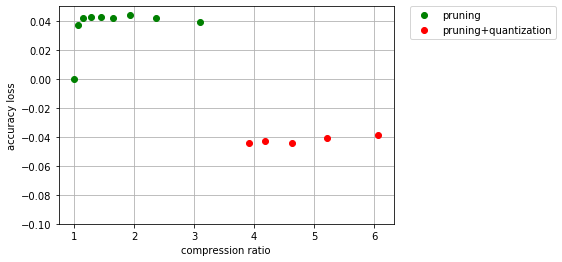

In [24]:
# plot points
fig, ax = plt.subplots()

ax.grid()
plt.plot(pruning_data['compression_ratio'], pruning_data['accuracy_loss'], 'bo', color='green', label='pruning')
plt.plot(pruning_quant_data['compression_ratio'], pruning_quant_data['accuracy_loss'], 'bo', color='red', label='pruning+quantization')
plt.ylim((-0.1, 0.05))
plt.xlabel('compression ratio')
plt.ylabel('accuracy loss')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

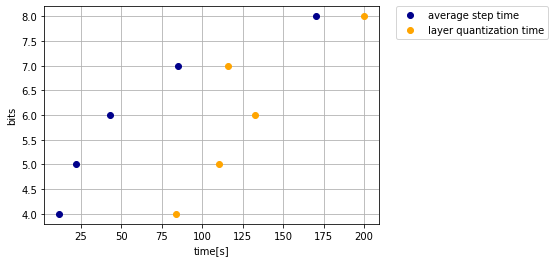

In [26]:
# plot time step points
fig, ax = plt.subplots()

ax.grid()
plt.plot(pruning_quant_data['avg_quant_time'], pruning_quant_data['bits'], 'bo', color='darkblue', label='average step time')
plt.plot(pruning_quant_data['layer_quant_time'], pruning_quant_data['bits'], 'bo', color='orange', label='layer quantization time')
plt.xlabel('time[s]')
plt.ylabel('bits')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

/home/oanaucs/virtualenvs/py_3.6_tf_1.5/lib/python3.6/site-packages/ipykernel_launcher.py:5: RankWarning: Polyfit may be poorly conditioned
  """
No handles with labels found to put in legend.


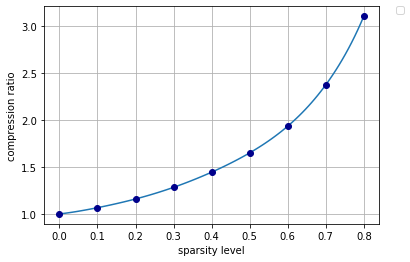

In [27]:
# plot points
fig, ax = plt.subplots()

ax.grid()
poly = np.polyfit(pruning_data['sparsity_level'], pruning_data['compression_ratio'], 10)
x = np.linspace(pruning_data['sparsity_level'].min(), pruning_data['sparsity_level'].max(), 100)
p = np.poly1d(poly)
plt.plot(x, p(x))
plt.plot(pruning_data['sparsity_level'], pruning_data['compression_ratio'], 'bo', color='darkblue')
plt.xlabel('sparsity level')
plt.ylabel('compression ratio')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

No handles with labels found to put in legend.


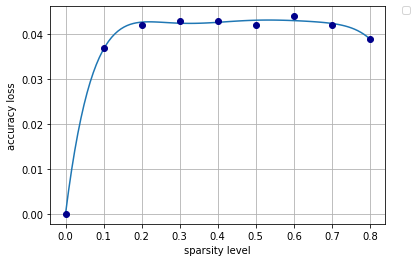

In [29]:
# plot points
fig, ax = plt.subplots()

ax.grid()
poly = np.polyfit(pruning_data['sparsity_level'], pruning_data['accuracy_loss'], 6)
x = np.linspace(pruning_data['sparsity_level'].min(), pruning_data['sparsity_level'].max(), 100)
p = np.poly1d(poly)
plt.plot(x, p(x))
plt.plot(pruning_data['sparsity_level'], pruning_data['accuracy_loss'], 'bo', color='darkblue')
plt.xlabel('sparsity level')
plt.ylabel('accuracy loss')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

In [30]:
threshold_filename = './../eval_results/alexnet/eval_alexnet_pruning_threshold.csv'
threshold_data = pd.read_csv(threshold_filename, decimal=',')

In [31]:
threshold_data['accuracy_loss'] = threshold_data['accuracy']
threshold_data['accuracy_loss'] -= pruning_data['accuracy'][0]
print(threshold_data)

   threshold  accuracy  params_set_to_0  size_mb_after_huffman  \
0      0.010     0.693         32630686                  138.4   
1      0.020     0.684          8417456                   53.3   
2      0.024     0.609          3624168                   30.2   
3      0.300     0.102          1176849                   19.5   

   compression_ratio  step_time  accuracy_loss  
0           1.508671      0.140          0.031  
1           3.917448      0.135          0.022  
2           6.913907      0.150         -0.053  
3          10.707692      0.150         -0.560  


No handles with labels found to put in legend.


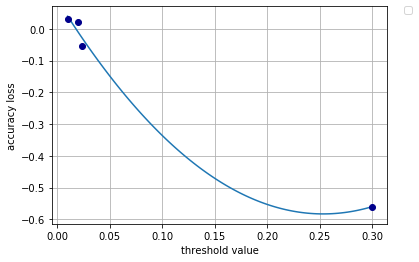

In [35]:
# plot points
fig, ax = plt.subplots()

ax.grid()
poly = np.polyfit(threshold_data['threshold'], threshold_data['accuracy_loss'], 2)
x = np.linspace(threshold_data['threshold'].min(), threshold_data['threshold'].max(), 100)
p = np.poly1d(poly)
plt.plot(x, p(x))
plt.plot(threshold_data['threshold'], threshold_data['accuracy_loss'], 'bo', color='darkblue')
plt.xlabel('threshold value')
plt.ylabel('accuracy loss')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)